In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

import lab_1_metafeatures.meta_features_logic as mf

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline 

from sklearn.metrics import r2_score

In [2]:
cwd_path = os.getcwd()
data_path = os.path.join(cwd_path, 'data')
lab_one_path = os.path.join(cwd_path, 'lab_1_metafeatures')
if not os.path.exists(lab_one_path):
    os.mkdir(lab_one_path)

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 20)

In [4]:
# get list of all datasets in ./data
list_dir = os.listdir(data_path)

# choose model and scaling method
model = SGDRegressor()
scaler = StandardScaler()

In [6]:
# download first df from the ./data 
raw_data = arff.loadarff(os.path.join(data_path, list_dir[0]))

In [7]:
# calculate features for the first df
data = pd.DataFrame(raw_data[0])
columns = data.columns[:-1]

meta_features = mf.MetaFeatures(data)

base_mf1 = meta_features.get_base_meta_features()
st_cat_mf1 = meta_features.get_categorial_meta_features()
st_discr_mf1 = meta_features.get_discret_meta_features()
structure_mf1 = meta_features.get_structure_meta_features(model, scaler)

# change rows and columns order 
# if the features will be the same
# everything calculates right
df = data[np.sort(columns)]
df = df.sort_values(df.columns[1])
target = data.iloc[:,-1]
data_ = df.merge(target, left_index=True, right_index=True)

meta_features_ = mf.MetaFeatures(data_)

base_mf2 = meta_features_.get_base_meta_features()
st_cat_mf2 = meta_features_.get_categorial_meta_features()
st_discr_mf2 = meta_features_.get_discret_meta_features()
structure_mf2 = meta_features_.get_structure_meta_features(model, scaler)

c:\Users\mirad\OneDrive\Рабочий стол\Обучение\Advanced and Auto ML\lab_1_metafeatures\meta_features_logic.py:148: RuntimeWarning: divide by zero encountered in log
  [np.where(x != 0, x * np.log(x), 0) for x in pi]
c:\Users\mirad\OneDrive\Рабочий стол\Обучение\Advanced and Auto ML\lab_1_metafeatures\meta_features_logic.py:148: RuntimeWarning: invalid value encountered in double_scalars
  [np.where(x != 0, x * np.log(x), 0) for x in pi]
c:\Users\mirad\OneDrive\Рабочий стол\Обучение\Advanced and Auto ML\lab_1_metafeatures\meta_features_logic.py:148: RuntimeWarning: divide by zero encountered in log
  [np.where(x != 0, x * np.log(x), 0) for x in pi]
c:\Users\mirad\OneDrive\Рабочий стол\Обучение\Advanced and Auto ML\lab_1_metafeatures\meta_features_logic.py:148: RuntimeWarning: invalid value encountered in double_scalars
  [np.where(x != 0, x * np.log(x), 0) for x in pi]


In [8]:
data_.head()

,'m','p','s',bc,bf,bl,blue%2Fbright%2Fvarn%2Fclean,bore,bt,bw%2Fme,carbon,cbond,chrom,condition,corr,enamelability,exptl,family,ferro,formability,hardness,jurofm,len,lustre,marvi,non-ageing,oil,packing,phos,product-type,shape,steel,strength,surface-finish,surface-quality,temper_rolling,thick,width,class
0,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'0',b'?',b'?',8.0,b'?',b'?',b'S',b'?',b'?',b'?',b'?',b'?',b'?',0.0,b'?',0.0,b'?',b'?',b'?',b'?',b'?',b'?',b'C',b'COIL',b'A',0.0,b'?',b'G',b'?',0.700,610.0,b'3'
591,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'0',b'?',b'?',0.0,b'?',b'?',b'S',b'?',b'?',b'?',b'?',b'?',b'?',45.0,b'?',0.0,b'?',b'?',b'?',b'?',b'?',b'?',b'C',b'COIL',b'A',0.0,b'?',b'D',b'?',0.700,610.0,b'3'
592,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'0',b'?',b'?',0.0,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',85.0,b'?',0.0,b'?',b'?',b'?',b'?',b'?',b'?',b'C',b'COIL',b'A',0.0,b'?',b'G',b'T',1.001,609.9,b'U'
593,b'?',b'?',b'?',b'?',b'Y',b'Y',b'?',b'0',b'?',b'?',0.0,b'?',b'?',b'S',b'?',b'?',b'?',b'?',b'?',b'2',0.0,b'?',762.0,b'?',b'?',b'?',b'?',b'?',b'?',b'C',b'SHEET',b'A',0.0,b'?',b'F',b'?',0.699,519.0,b'3'
594,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'0',b'?',b'?',65.0,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',0.0,b'?',0.0,b'?',b'?',b'?',b'?',b'?',b'?',b'C',b'COIL',b'K',0.0,b'?',b'?',b'?',3.000,65.1,b'3'


In [9]:
structure_mf1

{'model_min': -0.47,
 'model_max': 0.99,
 'model_kurtosis': 15.55,
 'model_variation': 48.33}

In [10]:
structure_mf2

{'model_min': -0.35,
 'model_max': 0.54,
 'model_kurtosis': 10.75,
 'model_variation': 36.01}

In [11]:
base_mf1 == base_mf2

True

In [12]:
st_cat_mf1 == st_cat_mf2

True

In [13]:
st_discr_mf1 == st_discr_mf2

True

In [14]:
# I used gradient descent  
# they did't find the same minimum
# that's ok
structure_mf1 == structure_mf2

False

In [15]:
# I've already run all dfs from ./data
# and got meta dataset 
all_meta_features = pd.read_csv('./Lab_1_MetaFeatures/all_meta.csv')

In [16]:
all_meta_features.describe()

,base_obj_Count,base_features_Count,base_persent_Categorial_features,base_class_Count,base_all_percent_of_nans,base_target_type,cat_meta_categCount_min,cat_meta_categCount_max,cat_meta_categCount_mean,cat_meta_entropy_min,cat_meta_entropy_max,cat_meta_entropy_mean,cat_meta_percent_nans_min,cat_meta_percent_nans_max,cat_meta_percent_nans_mean,disc_meta_min_min,disc_meta_min_max,disc_meta_min_mean,disc_meta_max_min,disc_meta_max_max,disc_meta_max_mean,disc_meta_mean_min,disc_meta_mean_max,disc_meta_mean_mean,disc_meta_variation_min,disc_meta_variation_max,disc_meta_variation_mean,disc_meta_skew_min,disc_meta_skew_max,disc_meta_skew_mean,disc_meta_kurtosis_min,disc_meta_kurtosis_max,disc_meta_kurtosis_mean,disc_meta_percent_of_nans_min,disc_meta_percent_of_nans_max,disc_meta_percent_of_nans_mean,model_min,model_max,model_kurtosis,model_variation,RF,SGD,kNN
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,7.420000e+02,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02,7.420000e+02,742.000000,7.420000e+02,742.000000,742.000000,742.000000
mean,545.041779,20.026954,0.218908,65.683288,0.004999,-474.393531,-54716.981132,-54624.198113,-54688.066065,-54716.445175,-54715.889178,-54716.237237,-54716.981132,-54716.981132,-54716.981132,-1.739963e+05,1.112823e+02,-3.251796e+04,-9.754101e+04,4.595098e+05,7.061636e+04,-1.300206e+05,8.491658e+04,-5.163974e+03,-9.555096e+15,inf,inf,-9703.899528,-9701.030054,-9702.751873,-9703.800135,-9679.424461,-9698.269906,-6603.630728,-6595.284367,-6601.678140,-7.283543e+03,8.493178e+03,2.660283,inf,0.810912,0.135013,0.606092
std,1283.917415,54.524833,0.319538,204.462617,0.026714,499.680704,49810.580014,49913.505747,49842.551141,49811.169564,49811.781157,49811.398292,49810.580014,49810.580014,49810.580014,4.560450e+06,8.192081e+04,7.608412e+05,2.481930e+06,4.622789e+06,1.209901e+06,3.364020e+06,1.362805e+06,6.575549e+05,6.988546e+16,NaN,NaN,29620.384463,29621.325952,29620.760938,29620.417520,29628.524509,29622.235987,24851.594904,24853.872820,24852.116611,1.776224e+05,2.191143e+05,21.094591,NaN,0.365554,0.317642,0.404574
min,20.000000,2.000000,0.000000,1.000000,0.000000,-1000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-1.242299e+08,-1.000000e+05,-2.070498e+07,-6.760999e+07,-1.000000e+05,-1.126832e+07,-9.163885e+07,-1.000000e+05,-1.527314e+07,-1.125337e+18,-7.139285e+07,-1.125337e+17,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-4.816438e+06,-1.100000e-01,-3.000000,-3.535688e+17,0.000000,0.000000,0.000000
25%,100.000000,5.000000,0.000000,2.000000,0.000000,-1000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-2.100000e+00,-1.425000e-01,-1.717500e+00,1.000000e+00,3.670000e+00,1.950000e+00,0.000000e+00,5.000000e-01,4.250000e-02,-1.000000e+05,5.325000e-01,1.500000e-01,-0.977500,0.175000,-0.020000,-1.377500,-0.520000,-1.070000,0.000000,0.000000,0.000000,-5.900000e-01,8.000000e-02,-0.890000,-5.017500e+00,0.904762,0.000000,0.154858
50%,222.000000,9.000000,0.000000,3.000000,0.000000,0.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,0.000000e+00,5.600000e+00,1.670000e+00,1.750000e+00,1.000000e+02,5.263500e+01,4.500000e-01,5.946500e+01,2.372000e+01,1.100000e-01,1.120000e+00,4.650000e-01,-0.245000,1.220000,0.175000,-1.200000,1.570000,-0.055000,0.000000,0.000000,0.000000,-1.550000e-01,1.900000e-01,0.125000,1.855000e+00,1.000000,0.00

In [16]:
# zero counting somewhere. just replace for the huge number
all_meta_features = all_meta_features.replace([np.inf], 100000)

In [17]:
all_meta_features.head()

,base_obj_Count,base_features_Count,base_persent_Categorial_features,base_class_Count,base_all_percent_of_nans,base_target_type,cat_meta_categCount_min,cat_meta_categCount_max,cat_meta_categCount_mean,cat_meta_entropy_min,cat_meta_entropy_max,cat_meta_entropy_mean,cat_meta_percent_nans_min,cat_meta_percent_nans_max,cat_meta_percent_nans_mean,disc_meta_min_min,disc_meta_min_max,disc_meta_min_mean,disc_meta_max_min,disc_meta_max_max,disc_meta_max_mean,disc_meta_mean_min,disc_meta_mean_max,disc_meta_mean_mean,disc_meta_variation_min,disc_meta_variation_max,disc_meta_variation_mean,disc_meta_skew_min,disc_meta_skew_max,disc_meta_skew_mean,disc_meta_kurtosis_min,disc_meta_kurtosis_max,disc_meta_kurtosis_mean,disc_meta_percent_of_nans_min,disc_meta_percent_of_nans_max,disc_meta_percent_of_nans_mean,model_min,model_max,model_kurtosis,model_variation,RF,SGD,kNN
0,898,31,0.81,5,0.0,0,0,897,233.85,0.01,1.42,0.41,0.0,0.0,0.0,0.0,0.24,0.04,4.00,4880.00,1210.67,1.20,1263.09,348.50,0.52,3.77,2.06,0.07,3.76,2.02,-0.97,13.14,4.62,0.0,0.0,0.0,-0.56,0.98,14.04,44.92,1.000000,0.054054,0.000000
1,148,18,0.83,4,0.0,0,0,141,37.63,0.19,1.75,0.77,0.0,0.0,0.0,1.0,1.00,1.00,3.00,8.00,5.00,1.06,2.60,2.05,0.29,0.73,0.45,0.33,5.39,2.30,-0.53,28.71,9.51,0.0,0.0,0.0,-0.18,0.18,0.53,-44.49,0.836735,0.000000,1.000000
2,76,45,1.00,2,0.0,-1000,0,75,11.92,0.07,4.33,0.86,0.0,0.0,0.0,-100000.0,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.0,-100000.0,-100000.0,-0.03,0.04,8.38,33.86,1.000000,1.000000,1.000000
3,339,17,1.00,2,0.0,-1000,0,332,97.68,0.10,1.22,0.56,0.0,0.0,0.0,-100000.0,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.0,-100000.0,-100000.0,-0.08,0.09,2.63,-57.09,1.000000,0.000000,0.955224
4,214,9,0.00,2,0.0,-1000,-100000,-100000,-100000.00,-100000.00,-100000.00,-100000.00,-100000.0,-100000.0,-100000.0,0.0,69.81,9.75,0.51,75.41,14.26,0.06,72.65,11.27,0.00,2.83,0.77,-1.14,6.51,1.64,-0.43,53.39,9.65,0.0,0.0,0.0,-0.10,0.05,-0.74,-8.15,1.000000,0.000000,0.592593


In [18]:
all_meta_features.shape

(742, 43)

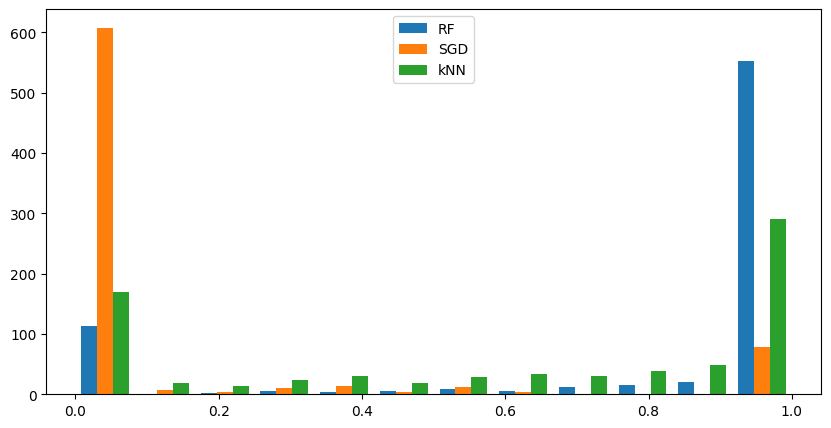

In [19]:
# RF - Random Forest
# SGD - Linear Regressor with stochastic gradient descent 
# kNN - kNN
# Alghoritms that I used on df (not meta df)
# plot describes alghoritms relative quality
fig = plt.figure(figsize = (10, 5))
ax = plt.hist(
    all_meta_features[['RF', 'SGD',	'kNN']], 
    bins=12, 
    label=['RF', 'SGD',	'kNN']
    )
plt.legend()
plt.show()

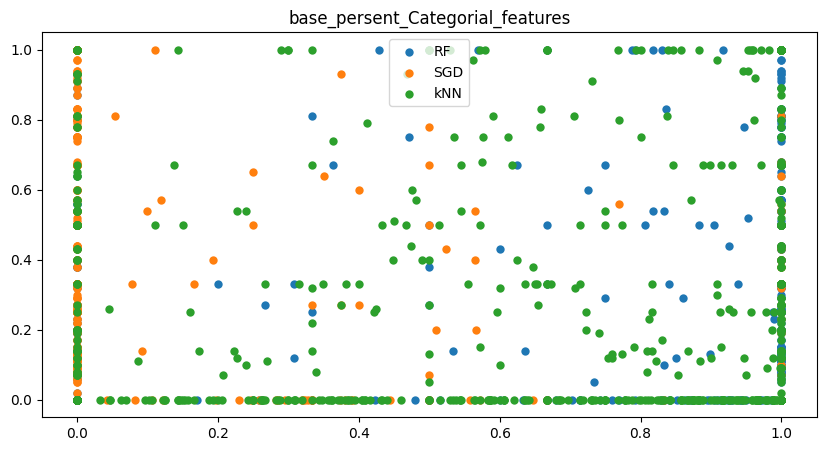

In [176]:
# plot describes how vars correlate with scores
col = all_meta_features.columns[2] #can change number 2..3..4..
fig = plt.figure(figsize = (10, 5))
ax = plt.scatter(
    all_meta_features['RF'],
    all_meta_features[col],
    linewidths=0.001
)
ax = plt.scatter(
    all_meta_features['SGD'],
    all_meta_features[col],
    linewidths=0.001
)
ax = plt.scatter(
    all_meta_features['kNN'],
    all_meta_features[col],
    linewidths=0.001
)
plt.legend(['RF', 'SGD',	'kNN'])
plt.title(col)
plt.show()

In [65]:
# when train on the meta df - scores on the common df are our target
targets = all_meta_features[['RF', 'SGD', 'kNN']]
df = all_meta_features.iloc[:,:-3].copy()

In [63]:
df.head()

,base_obj_Count,base_features_Count,base_persent_Categorial_features,base_class_Count,base_all_percent_of_nans,base_target_type,cat_meta_categCount_min,cat_meta_categCount_max,cat_meta_categCount_mean,cat_meta_entropy_min,cat_meta_entropy_max,cat_meta_entropy_mean,cat_meta_percent_nans_min,cat_meta_percent_nans_max,cat_meta_percent_nans_mean,disc_meta_min_min,disc_meta_min_max,disc_meta_min_mean,disc_meta_max_min,disc_meta_max_max,disc_meta_max_mean,disc_meta_mean_min,disc_meta_mean_max,disc_meta_mean_mean,disc_meta_variation_min,disc_meta_variation_max,disc_meta_variation_mean,disc_meta_skew_min,disc_meta_skew_max,disc_meta_skew_mean,disc_meta_kurtosis_min,disc_meta_kurtosis_max,disc_meta_kurtosis_mean,disc_meta_percent_of_nans_min,disc_meta_percent_of_nans_max,disc_meta_percent_of_nans_mean,model_min,model_max,model_kurtosis,model_variation
0,898,31,0.81,5,0.0,0,0,897,233.85,0.01,1.42,0.41,0.0,0.0,0.0,0.0,0.24,0.04,4.00,4880.00,1210.67,1.20,1263.09,348.50,0.52,3.77,2.06,0.07,3.76,2.02,-0.97,13.14,4.62,0.0,0.0,0.0,-0.56,0.98,14.04,44.92
1,148,18,0.83,4,0.0,0,0,141,37.63,0.19,1.75,0.77,0.0,0.0,0.0,1.0,1.00,1.00,3.00,8.00,5.00,1.06,2.60,2.05,0.29,0.73,0.45,0.33,5.39,2.30,-0.53,28.71,9.51,0.0,0.0,0.0,-0.18,0.18,0.53,-44.49
2,76,45,1.00,2,0.0,-1000,0,75,11.92,0.07,4.33,0.86,0.0,0.0,0.0,-100000.0,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.0,-100000.0,-100000.0,-0.03,0.04,8.38,33.86
3,339,17,1.00,2,0.0,-1000,0,332,97.68,0.10,1.22,0.56,0.0,0.0,0.0,-100000.0,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.00,-100000.0,-100000.0,-100000.0,-0.08,0.09,2.63,-57.09
4,214,9,0.00,2,0.0,-1000,-100000,-100000,-100000.00,-100000.00,-100000.00,-100000.00,-100000.0,-100000.0,-100000.0,0.0,69.81,9.75,0.51,75.41,14.26,0.06,72.65,11.27,0.00,2.83,0.77,-1.14,6.51,1.64,-0.43,53.39,9.65,0.0,0.0,0.0,-0.10,0.05,-0.74,-8.15


In [126]:
# list of models
models = [
    DummyRegressor(), 
    GradientBoostingRegressor(max_depth=4, n_estimators=100), 
    RandomForestRegressor(max_depth=3, bootstrap=False),
    LinearRegression()
    ]

results = {}
scaler = StandardScaler()
df_results = pd.DataFrame(index=df.index)

# I calculate r2 score for the each model and for the each target score
for model in models:
    for alghoritm in targets.columns:

        target = targets[alghoritm].copy()
        x_train, x_test, y_train, y_test = train_test_split(df, target)

        pipeline = make_pipeline(scaler, model)
        pipeline.fit(df, target)

        results[str(model) + '_' + alghoritm + '_train'] = r2_score(y_train, pipeline.predict(x_train))
        results[str(model) + '_' + alghoritm + '_test'] = r2_score(y_test, pipeline.predict(x_test))
        
        df_results[str(model) + '_' + alghoritm] = pipeline.predict(df)

In [90]:
print(y_train.shape, y_test.shape)

(556,) (186,)


In [124]:
# GBR looks good 
results

{'DummyRegressor()_RF_train': -0.00020806537335271713,
 'DummyRegressor()_RF_test': -0.0017742725627138967,
 'DummyRegressor()_SGD_train': -0.0004781627776437869,
 'DummyRegressor()_SGD_test': -0.0032484280412885536,
 'DummyRegressor()_kNN_train': -9.386446361370204e-05,
 'DummyRegressor()_kNN_test': -0.0009038921132740185,
 'GradientBoostingRegressor(max_depth=4)_RF_train': 0.8029572095057309,
 'GradientBoostingRegressor(max_depth=4)_RF_test': 0.7958174275145098,
 'GradientBoostingRegressor(max_depth=4)_SGD_train': 0.7804340339029998,
 'GradientBoostingRegressor(max_depth=4)_SGD_test': 0.7194708000091384,
 'GradientBoostingRegressor(max_depth=4)_kNN_train': 0.7636101692600873,
 'GradientBoostingRegressor(max_depth=4)_kNN_test': 0.7718428360205627,
 'RandomForestRegressor(bootstrap=False, max_depth=3)_RF_train': 0.2878874023142387,
 'RandomForestRegressor(bootstrap=False, max_depth=3)_RF_test': 0.18992818878814144,
 'RandomForestRegressor(bootstrap=False, max_depth=3)_SGD_train': 0.237